# Linear Regression

## Import necessary libraries and dataframes 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import scipy.stats as scs
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.feature_selection import RFE
import seaborn as sns
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import StatsFunctions as sf

In [2]:
#importing cvs files and saving them under a variable
kc_house_df = pd.read_csv("kc_df_cleaned.csv")
kc_house_df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long
0,221900.0,3,1180,5650,1.0,0.0,0.0,3,7,1180,98178,47.5112,-122.257
1,538000.0,3,2570,7242,2.0,0.0,0.0,3,7,2170,98125,47.7210,-122.319
2,180000.0,2,770,10000,1.0,0.0,0.0,3,6,770,98028,47.7379,-122.233
3,604000.0,4,1960,5000,1.0,0.0,0.0,5,7,1050,98136,47.5208,-122.393
4,510000.0,3,1680,8080,1.0,0.0,0.0,3,8,1680,98074,47.6168,-122.045


In [3]:
kc_house_df.isna().sum()

price          0
bedrooms       0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
view           0
condition      0
grade          0
sqft_above     0
zipcode        0
lat            0
long           0
dtype: int64

In [4]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19528 entries, 0 to 19527
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19528 non-null  float64
 1   bedrooms     19528 non-null  int64  
 2   sqft_living  19528 non-null  int64  
 3   sqft_lot     19528 non-null  int64  
 4   floors       19528 non-null  float64
 5   waterfront   19528 non-null  float64
 6   view         19528 non-null  float64
 7   condition    19528 non-null  int64  
 8   grade        19528 non-null  int64  
 9   sqft_above   19528 non-null  int64  
 10  zipcode      19528 non-null  int64  
 11  lat          19528 non-null  float64
 12  long         19528 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 1.9 MB


In [5]:
df_cont_log = pd.read_csv("df_cont_log_cleaned.csv")
df_cont_log.head()

,price_log,sqft_living_log
0,-1.479141,-1.120748
1,0.428868,0.855335
2,-1.929994,-2.204455
3,0.678166,0.167452
4,0.313720,-0.223886


***
## One-Hot Encoding categorcial features

I will use one-hot encoding to transfrom categorical columns into binary variables 

In [6]:
kc_house_df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long
0,221900.0,3,1180,5650,1.0,0.0,0.0,3,7,1180,98178,47.5112,-122.257
1,538000.0,3,2570,7242,2.0,0.0,0.0,3,7,2170,98125,47.7210,-122.319
2,180000.0,2,770,10000,1.0,0.0,0.0,3,6,770,98028,47.7379,-122.233
3,604000.0,4,1960,5000,1.0,0.0,0.0,5,7,1050,98136,47.5208,-122.393
4,510000.0,3,1680,8080,1.0,0.0,0.0,3,8,1680,98074,47.6168,-122.045


In [7]:
categoricals = ['bedrooms', 'floors', 'condition', 'grade']

cat_series = kc_house_df[categoricals]
df_cat = cat_series.astype('category')

In [8]:
df_cat.dtypes

bedrooms     category
floors       category
condition    category
grade        category
dtype: object

In [9]:
df_cat_ohe = pd.get_dummies(df_cat, prefix=categoricals, drop_first = True)

***
## Now, we combine the categorical and continous features

In [10]:
# combine features into a single dataframe called preprocessed
preprocessed = pd.concat([df_cont_log, df_cat_ohe], axis=1)
preprocessed.head()

,price_log,sqft_living_log,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,floors_1.5,floors_2.0,floors_2.5,floors_3.0,condition_3,condition_4,condition_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11
0,-1.479141,-1.120748,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0.428868,0.855335,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
2,-1.929994,-2.204455,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0.678166,0.167452,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,0.313720,-0.223886,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [11]:
preprocessed.isna().sum()

price_log          0
sqft_living_log    0
bedrooms_2         0
bedrooms_3         0
bedrooms_4         0
bedrooms_5         0
bedrooms_6         0
floors_1.5         0
floors_2.0         0
floors_2.5         0
floors_3.0         0
condition_3        0
condition_4        0
condition_5        0
grade_6            0
grade_7            0
grade_8            0
grade_9            0
grade_10           0
grade_11           0
dtype: int64

***
## Check for linearity

I will create a plot of continuous variables using Seaborn to determine if the target variable ('price_log') is linearly related to the input features

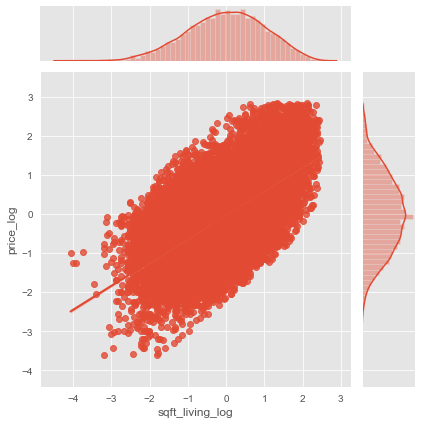

In [12]:
sns.jointplot('sqft_living_log', 'price_log', data=preprocessed, kind='reg')

Kinda hard to see but there is a linear relationship between the two.

***
## Fitting an initial model

In [13]:
features = list(preprocessed.drop('price_log', axis=1))

In [14]:
print(features)

['sqft_living_log', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'condition_3', 'condition_4', 'condition_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11']


In [15]:
model = sf.check_model(df=preprocessed, features_to_use=features, target_col='price_log', show_summary=True)

                                 OLS Regression Results                                
Dep. Variable:              price_log   R-squared (uncentered):                   0.507
Model:                            OLS   Adj. R-squared (uncentered):              0.507
Method:                 Least Squares   F-statistic:                              1058.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):                        0.00
Time:                        22:03:43   Log-Likelihood:                         -20793.
No. Observations:               19528   AIC:                                  4.162e+04
Df Residuals:                   19509   BIC:                                  4.177e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

***
## Checking for homoscedasticity

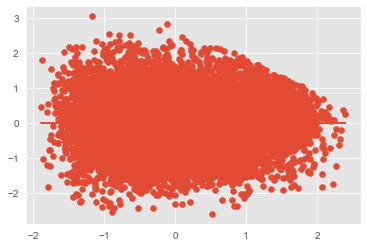

In [16]:
plt.scatter(model.predict(preprocessed[features]), model.resid)
plt.plot(model.predict(preprocessed[features]), [0 for i in range(len(preprocessed))])

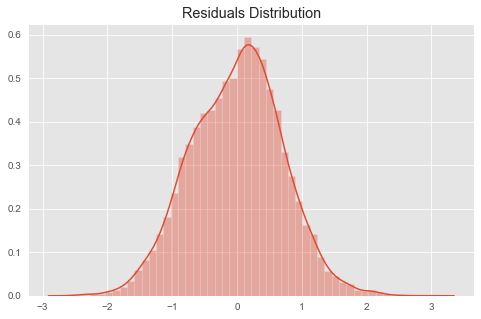

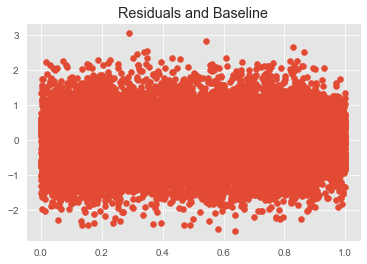

In [17]:
# Plotting residuas to look at distribution
sf.plot_residuals(model)

***
## Checking for Normality

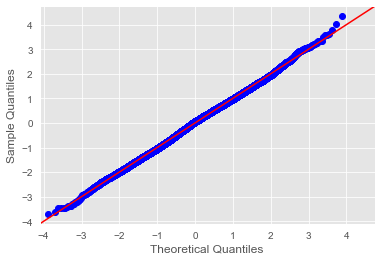

In [18]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)

Wowza! Looks pretty normal to me! However, the models seem to have failed the Shapiro test. I am not sure what to make of this...

***
## Train-Test Split and Cross Validation

### Cross validation

I will use cross validation to run multiple train-test splits to see if r-squared values are varying.

In [19]:
linreg = LinearRegression(fit_intercept=False)
X = preprocessed[features]
y = preprocessed['price_log']
cross_val_score(linreg, X, y, scoring='r2', n_jobs=-1, cv=5, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished


array([0.50205745, 0.49239544, 0.49738593, 0.5006447 , 0.53577955])

The r-squared values are similar which is good!

### Train-Test Split

In [20]:
# Conduct train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
linreg.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [21]:
# Comparing the r-squared values for train and test models
linreg.score(X_train, y_train), linreg.score(X_test, y_test)

(0.5031577893363273, 0.5290130871808763)

R-squared values of train and test models are very similar so this is good!

In [22]:
# Comparing coef values of OLS models above with coef of splits
linreg.coef_

array([ 0.41011608, -0.52121406, -0.86643183, -0.92035263, -0.89121955,
       -0.79914643,  0.4106724 , -0.08689302,  0.33964788,  0.22747574,
       -0.09565035,  0.04060008,  0.30084882,  0.18086449,  0.60373362,
        1.02134234,  1.52935983,  1.86803391,  2.14334541])

***
## Feature Engineering

In [23]:
kc_house_df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long
0,221900.0,3,1180,5650,1.0,0.0,0.0,3,7,1180,98178,47.5112,-122.257
1,538000.0,3,2570,7242,2.0,0.0,0.0,3,7,2170,98125,47.7210,-122.319
2,180000.0,2,770,10000,1.0,0.0,0.0,3,6,770,98028,47.7379,-122.233
3,604000.0,4,1960,5000,1.0,0.0,0.0,5,7,1050,98136,47.5208,-122.393
4,510000.0,3,1680,8080,1.0,0.0,0.0,3,8,1680,98074,47.6168,-122.045


In [24]:
preprocessed_latlong = pd.concat([preprocessed, kc_house_df[['lat', 'long']]], axis=1)

In [25]:
preprocessed_latlong.head()

,price_log,sqft_living_log,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,floors_1.5,floors_2.0,floors_2.5,...,condition_4,condition_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,lat,long
0,-1.479141,-1.120748,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,47.5112,-122.257
1,0.428868,0.855335,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,47.7210,-122.319
2,-1.929994,-2.204455,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,47.7379,-122.233
3,0.678166,0.167452,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,47.5208,-122.393
4,0.313720,-0.223886,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,47.6168,-122.045


In [26]:
drop_cols = ['price_log']
X = preprocessed_latlong.drop(columns=drop_cols)
y = preprocessed_latlong['price_log']
ols = sm.OLS(y, X)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_log   R-squared (uncentered):                   0.667
Model:                            OLS   Adj. R-squared (uncentered):              0.666
Method:                 Least Squares   F-statistic:                              1856.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):                        0.00
Time:                        22:03:49   Log-Likelihood:                         -16986.
No. Observations:               19528   AIC:                                  3.401e+04
Df Residuals:                   19507   BIC:                                  3.418e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
sqft_living_log     0.3609      0.007     48.654      0.000       0.346       0.375
bedrooms_2         -0.1276      0.048     -2.665      0.008      -0.221      -0.034
bedrooms_3         -0.3646      0.048     -7.590      0.000      -0.459      -0.270
bedrooms_4         -0.3835      0.049     -7.774      0.000      -0.480      -0.287
bedrooms_5         -0.3389      0.052     -6.519      0.000      -0.441      -0.237
bedrooms_6         -0.2827      0.064     -4.418      0.000      -0.408      -0.157
floors_1.5          0.3509      0.015     22.936      0.000       0.321       0.381
floors_2.0         -0.0377      0.011     -3.439      0.001      -0.059      -0.016
floors_2.5          0.3723      0.054      6.838      0.000       0.266       0.479
floors_3.0          0.1173      0.026      4.475      0.000       0.066       0.169
condition_3         0.1195      0.049      2.448      0.014       0.024       0.215
condition_4         0.3012      0.049      6.139      0.000       0.205       0.397
condition_5         0.5237      0.051     10.350      0.000       0.425       0.623
grade_6             0.3092      0.043      7.186      0.000       0.225       0.393
grade_7             0.6217      0.042     14.635      0.000       0.538       0.705
grade_8             0.9897      0.044     22.526      0.000       0.904       1.076
grade_9             1.4255      0.046     30.669      0.000       1.334       1.517
grade_10            1.6937      0.050     33.651      0.000       1.595       1.792
grade_11            1.9702      0.066     29.887      0.000       1.841       2.099
lat                 2.8639      0.030     95.671      0.000       2.805       2.923
long                1.1204      0.012     96.183      0.000       1.098       1.143
==============================================================================
Omnibus:                      461.721   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              578.039
Skew:                           0.308   Prob(JB):                    3.02e-126
Kurtosis:                       3.575   Cond. No.                     3.62e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

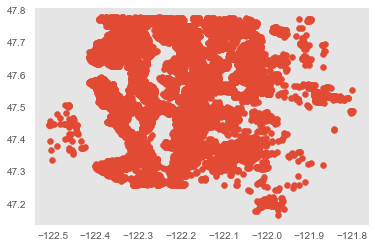

In [27]:
plt.scatter(preprocessed_latlong['long'], preprocessed_latlong['lat'])
plt.grid()
plt.show()

In [28]:
def distance(row, distance_equation='manhattan'):
    center_point = [-122.25, 47.6]
    if distance_equation == 'manhattan':
        lat_diff = abs(row['lat'] - center_point[1])*69
        long_diff = abs(row['long'] - center_point[0])*69
        distance = lat_diff + long_diff
    if distance_equation == "euclidean":
        lat_diff = abs(row['lat'] - center_point[1])*69
        long_diff = abs(row['long'] - center_point[0])*69
        distance = np.sqrt(lat_diff**2 + long_diff**2)
    return distance

In [29]:
preprocessed_latlong['dist_from_center_man'] = preprocessed_latlong.apply(distance, axis=1)
preprocessed_latlong.head()

,price_log,sqft_living_log,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,floors_1.5,floors_2.0,floors_2.5,...,condition_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,lat,long,dist_from_center_man
0,-1.479141,-1.120748,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,47.5112,-122.257,6.6102
1,0.428868,0.855335,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,47.7210,-122.319,13.1100
2,-1.929994,-2.204455,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,47.7379,-122.233,10.6881
3,0.678166,0.167452,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,47.5208,-122.393,15.3318
4,0.313720,-0.223886,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,47.6168,-122.045,15.3042


In [30]:
preprocessed_latlong['dist_from_center_euc'] = preprocessed_latlong.apply(lambda row: distance(row, distance_equation='euclidean'), axis=1)
preprocessed_latlong.head()

,price_log,sqft_living_log,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,floors_1.5,floors_2.0,floors_2.5,...,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,lat,long,dist_from_center_man,dist_from_center_euc
0,-1.479141,-1.120748,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,47.5112,-122.257,6.6102,6.146208
1,0.428868,0.855335,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,47.7210,-122.319,13.1100,9.611083
2,-1.929994,-2.204455,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,47.7379,-122.233,10.6881,9.587130
3,0.678166,0.167452,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,47.5208,-122.393,15.3318,11.279261
4,0.313720,-0.223886,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,47.6168,-122.045,15.3042,14.192419


In [31]:
drop_cols = ['price_log', 'lat', 'long', 'dist_from_center_man']
X = preprocessed_latlong.drop(columns=drop_cols)
y = preprocessed_latlong['price_log']
ols = sm.OLS(y, X)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_log   R-squared (uncentered):                   0.637
Model:                            OLS   Adj. R-squared (uncentered):              0.637
Method:                 Least Squares   F-statistic:                              1715.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):                        0.00
Time:                        22:03:50   Log-Likelihood:                         -17803.
No. Observations:               19528   AIC:                                  3.565e+04
Df Residuals:                   19508   BIC:                                  3.580e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
sqft_living_log          0.4427      0.007     59.287      0.000       0.428       0.457
bedrooms_2              -0.1831      0.042     -4.348      0.000      -0.266      -0.101
bedrooms_3              -0.4092      0.042     -9.734      0.000      -0.492      -0.327
bedrooms_4              -0.4775      0.043    -11.120      0.000      -0.562      -0.393
bedrooms_5              -0.5273      0.046    -11.529      0.000      -0.617      -0.438
bedrooms_6              -0.5588      0.060     -9.389      0.000      -0.675      -0.442
floors_1.5               0.2752      0.016     17.193      0.000       0.244       0.307
floors_2.0               0.0307      0.011      2.670      0.008       0.008       0.053
floors_2.5               0.2359      0.057      4.155      0.000       0.125       0.347
floors_3.0               0.0643      0.027      2.351      0.019       0.011       0.118
condition_3              0.2643      0.041      6.469      0.000       0.184       0.344
condition_4              0.3883      0.041      9.444      0.000       0.308       0.469
condition_5              0.5681      0.043     13.246      0.000       0.484       0.652
grade_6                  0.2332      0.040      5.792      0.000       0.154       0.312
grade_7                  0.5953      0.040     15.022      0.000       0.518       0.673
grade_8                  0.9717      0.041     23.771      0.000       0.892       1.052
grade_9                  1.4130      0.043     32.613      0.000       1.328       1.498
grade_10                 1.7080      0.047     36.073      0.000       1.615       1.801
grade_11                 1.9250      0.065     29.724      0.000       1.798       2.052
dist_from_center_euc    -0.0627      0.001    -83.606      0.000      -0.064      -0.061
==============================================================================
Omnibus:                       59.484   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.801
Skew:                          -0.111   Prob(JB):                     2.31e-14
Kurtosis:                       3.168   Cond. No.                         375.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
drop_cols = ['price_log', 'lat', 'long', 'dist_from_center_euc']
X = preprocessed_latlong.drop(columns=drop_cols)
y = preprocessed_latlong['price_log']
ols = sm.OLS(y, X)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_log   R-squared (uncentered):                   0.631
Model:                            OLS   Adj. R-squared (uncentered):              0.631
Method:                 Least Squares   F-statistic:                              1668.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):                        0.00
Time:                        22:03:50   Log-Likelihood:                         -17976.
No. Observations:               19528   AIC:                                  3.599e+04
Df Residuals:                   19508   BIC:                                  3.615e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
sqft_living_log          0.4417      0.008     58.630      0.000       0.427       0.456
bedrooms_2              -0.1956      0.042     -4.603      0.000      -0.279      -0.112
bedrooms_3              -0.4359      0.042    -10.283      0.000      -0.519      -0.353
bedrooms_4              -0.5071      0.043    -11.713      0.000      -0.592      -0.422
bedrooms_5              -0.5524      0.046    -11.974      0.000      -0.643      -0.462
bedrooms_6              -0.5831      0.060     -9.713      0.000      -0.701      -0.465
floors_1.5               0.2861      0.016     17.725      0.000       0.254       0.318
floors_2.0               0.0234      0.012      2.018      0.044       0.001       0.046
floors_2.5               0.2340      0.057      4.086      0.000       0.122       0.346
floors_3.0               0.0965      0.028      3.498      0.000       0.042       0.151
condition_3              0.2445      0.041      5.934      0.000       0.164       0.325
condition_4              0.3739      0.041      9.015      0.000       0.293       0.455
condition_5              0.5678      0.043     13.121      0.000       0.483       0.653
grade_6                  0.2579      0.041      6.349      0.000       0.178       0.338
grade_7                  0.6201      0.040     15.508      0.000       0.542       0.698
grade_8                  0.9940      0.041     24.103      0.000       0.913       1.075
grade_9                  1.4314      0.044     32.750      0.000       1.346       1.517
grade_10                 1.7137      0.048     35.875      0.000       1.620       1.807
grade_11                 1.9653      0.065     30.086      0.000       1.837       2.093
dist_from_center_man    -0.0476      0.001    -80.779      0.000      -0.049      -0.046
==============================================================================
Omnibus:                       78.816   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.409
Skew:                          -0.140   Prob(JB):                     2.10e-18
Kurtosis:                       3.146   Cond. No.                         480.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19528 entries, 0 to 19527
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19528 non-null  float64
 1   bedrooms     19528 non-null  int64  
 2   sqft_living  19528 non-null  int64  
 3   sqft_lot     19528 non-null  int64  
 4   floors       19528 non-null  float64
 5   waterfront   19528 non-null  float64
 6   view         19528 non-null  float64
 7   condition    19528 non-null  int64  
 8   grade        19528 non-null  int64  
 9   sqft_above   19528 non-null  int64  
 10  zipcode      19528 non-null  int64  
 11  lat          19528 non-null  float64
 12  long         19528 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 1.9 MB


### From my EDA I have seen that the zipcodes with the highest average home prices seem to be arroudn bodies of water. I want to see if having a waterfront or a view effects average home price.

In [34]:
preprocessed_scenery = pd.concat([preprocessed, kc_house_df[['view', 'waterfront']]], axis=1)

In [35]:
preprocessed_scenery.head()

,price_log,sqft_living_log,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,floors_1.5,floors_2.0,floors_2.5,...,condition_4,condition_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,view,waterfront
0,-1.479141,-1.120748,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.0,0.0
1,0.428868,0.855335,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0.0,0.0
2,-1.929994,-2.204455,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.0,0.0
3,0.678166,0.167452,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0.0,0.0
4,0.313720,-0.223886,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.0,0.0


In [36]:
drop_cols = ['price_log']
X = preprocessed_scenery.drop(columns=drop_cols)
y = preprocessed_scenery['price_log']
ols = sm.OLS(y, X)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_log   R-squared (uncentered):                   0.514
Model:                            OLS   Adj. R-squared (uncentered):              0.513
Method:                 Least Squares   F-statistic:                              1031.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):                        0.00
Time:                        22:03:51   Log-Likelihood:                         -20667.
No. Observations:               19528   AIC:                                  4.137e+04
Df Residuals:                   19508   BIC:                                  4.153e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
sqft_living_log     0.4028      0.009     46.437      0.000       0.386       0.420
bedrooms_2         -0.4645      0.049     -9.551      0.000      -0.560      -0.369
bedrooms_3         -0.8098      0.048    -16.745      0.000      -0.905      -0.715
bedrooms_4         -0.8546      0.049    -17.289      0.000      -0.951      -0.758
bedrooms_5         -0.8047      0.053    -15.235      0.000      -0.908      -0.701
bedrooms_6         -0.7622      0.069    -11.069      0.000      -0.897      -0.627
floors_1.5          0.4002      0.018     21.689      0.000       0.364       0.436
floors_2.0         -0.0711      0.013     -5.362      0.000      -0.097      -0.045
floors_2.5          0.3557      0.066      5.410      0.000       0.227       0.485
floors_3.0          0.2393      0.032      7.569      0.000       0.177       0.301
condition_3        -0.1482      0.047     -3.153      0.002      -0.240      -0.056
condition_4        -0.0176      0.047     -0.372      0.710      -0.110       0.075
condition_5         0.2456      0.050      4.959      0.000       0.149       0.343
grade_6             0.1563      0.047      3.353      0.001       0.065       0.248
grade_7             0.5803      0.046     12.646      0.000       0.490       0.670
grade_8             0.9867      0.047     20.841      0.000       0.894       1.080
grade_9             1.4886      0.050     29.668      0.000       1.390       1.587
grade_10            1.8146      0.055     33.098      0.000       1.707       1.922
grade_11            2.0801      0.075     27.741      0.000       1.933       2.227
view                0.1942      0.012     15.964      0.000       0.170       0.218
waterfront               0          0        nan        nan           0           0
==============================================================================
Omnibus:                        5.338   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.361
Skew:                          -0.038   Prob(JB):                       0.0685
Kurtosis:                       2.973   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [37]:
def home_has_scenery(view, waterfront):
    scenery = 'no'
    if (view == 1 or waterfront == 1):
        scenery = 'yes'
    return scenery

In [38]:
preprocessed_scenery.head()

,price_log,sqft_living_log,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,floors_1.5,floors_2.0,floors_2.5,...,condition_4,condition_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,view,waterfront
0,-1.479141,-1.120748,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.0,0.0
1,0.428868,0.855335,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0.0,0.0
2,-1.929994,-2.204455,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.0,0.0
3,0.678166,0.167452,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0.0,0.0
4,0.313720,-0.223886,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.0,0.0


In [39]:
preprocessed_scenery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19528 entries, 0 to 19527
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price_log        19528 non-null  float64
 1   sqft_living_log  19528 non-null  float64
 2   bedrooms_2       19528 non-null  uint8  
 3   bedrooms_3       19528 non-null  uint8  
 4   bedrooms_4       19528 non-null  uint8  
 5   bedrooms_5       19528 non-null  uint8  
 6   bedrooms_6       19528 non-null  uint8  
 7   floors_1.5       19528 non-null  uint8  
 8   floors_2.0       19528 non-null  uint8  
 9   floors_2.5       19528 non-null  uint8  
 10  floors_3.0       19528 non-null  uint8  
 11  condition_3      19528 non-null  uint8  
 12  condition_4      19528 non-null  uint8  
 13  condition_5      19528 non-null  uint8  
 14  grade_6          19528 non-null  uint8  
 15  grade_7          19528 non-null  uint8  
 16  grade_8          19528 non-null  uint8  
 17  grade_9     

In [40]:
preprocessed_scenery['waterfront'] = np.int64(preprocessed_scenery['waterfront'])

In [41]:
preprocessed_scenery['view'] = np.int64(preprocessed_scenery['view'])

In [42]:
preprocessed_scenery.head()

,price_log,sqft_living_log,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,floors_1.5,floors_2.0,floors_2.5,...,condition_4,condition_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,view,waterfront
0,-1.479141,-1.120748,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.428868,0.855335,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.929994,-2.204455,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.678166,0.167452,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,0.313720,-0.223886,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
preprocessed_scenery['has_scenery'] = preprocessed_scenery.apply(lambda row: home_has_scenery(row.view, row.waterfront), axis=1)
preprocessed_scenery.head()

,price_log,sqft_living_log,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,floors_1.5,floors_2.0,floors_2.5,...,condition_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,view,waterfront,has_scenery
0,-1.479141,-1.120748,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,no
1,0.428868,0.855335,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,no
2,-1.929994,-2.204455,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,no
3,0.678166,0.167452,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,no
4,0.313720,-0.223886,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,no


In [44]:
drop_cols = ['price_log', 'view', 'waterfront', 'has_scenery']
X = preprocessed_scenery.drop(columns=drop_cols)
y = preprocessed_scenery['price_log']
ols = sm.OLS(y, X)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_log   R-squared (uncentered):                   0.507
Model:                            OLS   Adj. R-squared (uncentered):              0.507
Method:                 Least Squares   F-statistic:                              1058.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):                        0.00
Time:                        22:03:51   Log-Likelihood:                         -20793.
No. Observations:               19528   AIC:                                  4.162e+04
Df Residuals:                   19509   BIC:                                  4.177e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
sqft_living_log     0.4153      0.009     47.765      0.000       0.398       0.432
bedrooms_2         -0.4568      0.049     -9.333      0.000      -0.553      -0.361
bedrooms_3         -0.8145      0.049    -16.734      0.000      -0.910      -0.719
bedrooms_4         -0.8666      0.050    -17.420      0.000      -0.964      -0.769
bedrooms_5         -0.8127      0.053    -15.287      0.000      -0.917      -0.708
bedrooms_6         -0.7669      0.069    -11.066      0.000      -0.903      -0.631
floors_1.5          0.4004      0.019     21.562      0.000       0.364       0.437
floors_2.0         -0.0890      0.013     -6.695      0.000      -0.115      -0.063
floors_2.5          0.3378      0.066      5.106      0.000       0.208       0.467
floors_3.0          0.2259      0.032      7.100      0.000       0.164       0.288
condition_3        -0.1297      0.047     -2.743      0.006      -0.222      -0.037
condition_4         0.0040      0.048      0.085      0.932      -0.089       0.097
condition_5         0.2719      0.050      5.458      0.000       0.174       0.369
grade_6             0.1619      0.047      3.451      0.001       0.070       0.254
grade_7             0.5850      0.046     12.666      0.000       0.494       0.675
grade_8             1.0048      0.048     21.091      0.000       0.911       1.098
grade_9             1.5130      0.050     29.974      0.000       1.414       1.612
grade_10            1.8438      0.055     33.431      0.000       1.736       1.952
grade_11            2.1214      0.075     28.126      0.000       1.974       2.269
==============================================================================
Omnibus:                        3.241   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                3.264
Skew:                          -0.029   Prob(JB):                        0.196
Kurtosis:                       2.975   Cond. No.                         32.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This OLD lowered R-squared value... Let try something else
***


## Lets look at the sqft_lot to sqft_living ratio

In [45]:
kc_house_df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long
0,221900.0,3,1180,5650,1.0,0.0,0.0,3,7,1180,98178,47.5112,-122.257
1,538000.0,3,2570,7242,2.0,0.0,0.0,3,7,2170,98125,47.7210,-122.319
2,180000.0,2,770,10000,1.0,0.0,0.0,3,6,770,98028,47.7379,-122.233
3,604000.0,4,1960,5000,1.0,0.0,0.0,5,7,1050,98136,47.5208,-122.393
4,510000.0,3,1680,8080,1.0,0.0,0.0,3,8,1680,98074,47.6168,-122.045


In [46]:
preprocessed.head()

,price_log,sqft_living_log,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,floors_1.5,floors_2.0,floors_2.5,floors_3.0,condition_3,condition_4,condition_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11
0,-1.479141,-1.120748,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0.428868,0.855335,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
2,-1.929994,-2.204455,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0.678166,0.167452,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,0.313720,-0.223886,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [47]:
preprocessed_lot_living = pd.concat([preprocessed, kc_house_df[['sqft_lot', 'sqft_living']]], axis=1)

In [48]:
preprocessed_lot_living.head()

,price_log,sqft_living_log,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,floors_1.5,floors_2.0,floors_2.5,...,condition_4,condition_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,sqft_lot,sqft_living
0,-1.479141,-1.120748,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,5650,1180
1,0.428868,0.855335,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,7242,2570
2,-1.929994,-2.204455,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,10000,770
3,0.678166,0.167452,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,5000,1960
4,0.313720,-0.223886,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,8080,1680


In [49]:
drop_cols = ['price_log']
X = preprocessed_lot_living.drop(columns=drop_cols)
y = preprocessed_lot_living['price_log']
ols = sm.OLS(y, X)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_log   R-squared (uncentered):                   0.510
Model:                            OLS   Adj. R-squared (uncentered):              0.509
Method:                 Least Squares   F-statistic:                              965.3
Date:                Sun, 01 Nov 2020   Prob (F-statistic):                        0.00
Time:                        22:03:51   Log-Likelihood:                         -20751.
No. Observations:               19528   AIC:                                  4.154e+04
Df Residuals:                   19507   BIC:                                  4.171e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
sqft_living_log     0.4331      0.019     22.761      0.000       0.396       0.470
bedrooms_2         -0.4306      0.051     -8.370      0.000      -0.531      -0.330
bedrooms_3         -0.7885      0.050    -15.640      0.000      -0.887      -0.690
bedrooms_4         -0.8441      0.052    -16.280      0.000      -0.946      -0.742
bedrooms_5         -0.7948      0.056    -14.193      0.000      -0.905      -0.685
bedrooms_6         -0.7478      0.072    -10.383      0.000      -0.889      -0.607
floors_1.5          0.3940      0.019     21.238      0.000       0.358       0.430
floors_2.0         -0.1052      0.013     -7.851      0.000      -0.131      -0.079
floors_2.5          0.3057      0.066      4.623      0.000       0.176       0.435
floors_3.0          0.1920      0.032      6.007      0.000       0.129       0.255
condition_3        -0.1065      0.053     -2.000      0.046      -0.211      -0.002
condition_4         0.0342      0.054      0.639      0.523      -0.071       0.139
condition_5         0.2930      0.056      5.269      0.000       0.184       0.402
grade_6             0.1809      0.049      3.725      0.000       0.086       0.276
grade_7             0.5941      0.047     12.613      0.000       0.502       0.686
grade_8             1.0169      0.049     20.882      0.000       0.921       1.112
grade_9             1.5333      0.053     29.193      0.000       1.430       1.636
grade_10            1.8806      0.059     32.040      0.000       1.766       1.996
grade_11            2.1702      0.079     27.347      0.000       2.015       2.326
sqft_lot         -3.63e-06   4.02e-07     -9.035      0.000   -4.42e-06   -2.84e-06
sqft_living     -8.808e-06   2.58e-05     -0.342      0.733   -5.93e-05    4.17e-05
==============================================================================
Omnibus:                        4.454   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.473
Skew:                          -0.036   Prob(JB):                        0.107
Kurtosis:                       2.984   Cond. No.                     4.63e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
def living_lot_ratio(living, lot):
    return abs(living/lot)

In [51]:
preprocessed_lot_living['lot_liv_ratio'] = preprocessed_lot_living.apply(lambda row: living_lot_ratio(row.sqft_living, row.sqft_lot), axis=1)
preprocessed_lot_living.head()

,price_log,sqft_living_log,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,floors_1.5,floors_2.0,floors_2.5,...,condition_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,sqft_lot,sqft_living,lot_liv_ratio
0,-1.479141,-1.120748,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,5650,1180,0.208850
1,0.428868,0.855335,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,7242,2570,0.354874
2,-1.929994,-2.204455,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,10000,770,0.077000
3,0.678166,0.167452,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,5000,1960,0.392000
4,0.313720,-0.223886,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,8080,1680,0.207921


In [52]:
drop_cols = ['price_log', 'sqft_lot', 'sqft_living', 'lot_liv_ratio']
X = preprocessed_lot_living.drop(columns=drop_cols)
y = preprocessed_lot_living['price_log']
ols = sm.OLS(y, X)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_log   R-squared (uncentered):                   0.507
Model:                            OLS   Adj. R-squared (uncentered):              0.507
Method:                 Least Squares   F-statistic:                              1058.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):                        0.00
Time:                        22:03:52   Log-Likelihood:                         -20793.
No. Observations:               19528   AIC:                                  4.162e+04
Df Residuals:                   19509   BIC:                                  4.177e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
sqft_living_log     0.4153      0.009     47.765      0.000       0.398       0.432
bedrooms_2         -0.4568      0.049     -9.333      0.000      -0.553      -0.361
bedrooms_3         -0.8145      0.049    -16.734      0.000      -0.910      -0.719
bedrooms_4         -0.8666      0.050    -17.420      0.000      -0.964      -0.769
bedrooms_5         -0.8127      0.053    -15.287      0.000      -0.917      -0.708
bedrooms_6         -0.7669      0.069    -11.066      0.000      -0.903      -0.631
floors_1.5          0.4004      0.019     21.562      0.000       0.364       0.437
floors_2.0         -0.0890      0.013     -6.695      0.000      -0.115      -0.063
floors_2.5          0.3378      0.066      5.106      0.000       0.208       0.467
floors_3.0          0.2259      0.032      7.100      0.000       0.164       0.288
condition_3        -0.1297      0.047     -2.743      0.006      -0.222      -0.037
condition_4         0.0040      0.048      0.085      0.932      -0.089       0.097
condition_5         0.2719      0.050      5.458      0.000       0.174       0.369
grade_6             0.1619      0.047      3.451      0.001       0.070       0.254
grade_7             0.5850      0.046     12.666      0.000       0.494       0.675
grade_8             1.0048      0.048     21.091      0.000       0.911       1.098
grade_9             1.5130      0.050     29.974      0.000       1.414       1.612
grade_10            1.8438      0.055     33.431      0.000       1.736       1.952
grade_11            2.1214      0.075     28.126      0.000       1.974       2.269
==============================================================================
Omnibus:                        3.241   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                3.264
Skew:                          -0.029   Prob(JB):                        0.196
Kurtosis:                       2.975   Cond. No.                         32.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Looking at sqft_bedroom

In [53]:
kc_house_df

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long
0,221900.0,3,1180,5650,1.0,0.0,0.0,3,7,1180,98178,47.5112,-122.257
1,538000.0,3,2570,7242,2.0,0.0,0.0,3,7,2170,98125,47.7210,-122.319
2,180000.0,2,770,10000,1.0,0.0,0.0,3,6,770,98028,47.7379,-122.233
3,604000.0,4,1960,5000,1.0,0.0,0.0,5,7,1050,98136,47.5208,-122.393
4,510000.0,3,1680,8080,1.0,0.0,0.0,3,8,1680,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19523,360000.0,3,1530,1131,3.0,0.0,0.0,3,8,1530,98103,47.6993,-122.346
19524,400000.0,4,2310,5813,2.0,0.0,0.0,3,8,2310,98146,47.5107,-122.362
19525,402101.0,2,1020,1350,2.0,0.0,0.0,3,7,1020,98144,47.5944,-122.299
19526,400000.0,3,1600,2388,2.0,0.0,0.0,3,8,1600,98027,47.5345,-122.069


In [54]:
def sqft_bed(sqft, bedrooms):
    return abs(sqft/bedrooms)

In [55]:
kc_house_df['sqft_per_bedroom'] = kc_house_df.apply(lambda row: sqft_bed(row.sqft_living, row.bedrooms), axis=1)
kc_house_df.head()


,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_per_bedroom
0,221900.0,3,1180,5650,1.0,0.0,0.0,3,7,1180,98178,47.5112,-122.257,393.333333
1,538000.0,3,2570,7242,2.0,0.0,0.0,3,7,2170,98125,47.7210,-122.319,856.666667
2,180000.0,2,770,10000,1.0,0.0,0.0,3,6,770,98028,47.7379,-122.233,385.000000
3,604000.0,4,1960,5000,1.0,0.0,0.0,5,7,1050,98136,47.5208,-122.393,490.000000
4,510000.0,3,1680,8080,1.0,0.0,0.0,3,8,1680,98074,47.6168,-122.045,560.000000


In [56]:
preprocessed_sqft_bedroom = pd.concat([preprocessed, kc_house_df[['sqft_per_bedroom']]], axis=1)

In [57]:
preprocessed_sqft_bedroom.head()

,price_log,sqft_living_log,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,floors_1.5,floors_2.0,floors_2.5,...,condition_3,condition_4,condition_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,sqft_per_bedroom
0,-1.479141,-1.120748,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,393.333333
1,0.428868,0.855335,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,856.666667
2,-1.929994,-2.204455,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,385.000000
3,0.678166,0.167452,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,490.000000
4,0.313720,-0.223886,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,560.000000


In [58]:
drop_cols = ['price_log','bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'sqft_living_log', 'sqft_per_bedroom']
X = preprocessed_sqft_bedroom.drop(columns=drop_cols)
y = preprocessed_sqft_bedroom['price_log']
ols = sm.OLS(y, X)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_log   R-squared (uncentered):                   0.434
Model:                            OLS   Adj. R-squared (uncentered):              0.433
Method:                 Least Squares   F-statistic:                              1150.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):                        0.00
Time:                        22:03:53   Log-Likelihood:                         -22157.
No. Observations:               19528   AIC:                                  4.434e+04
Df Residuals:                   19515   BIC:                                  4.444e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
floors_1.5      0.4492      0.020     22.751      0.000       0.411       0.488
floors_2.0      0.0079      0.014      0.566      0.571      -0.020       0.035
floors_2.5      0.4430      0.071      6.253      0.000       0.304       0.582
floors_3.0      0.0289      0.034      0.856      0.392      -0.037       0.095
condition_3    -0.8818      0.042    -20.830      0.000      -0.965      -0.799
condition_4    -0.7202      0.043    -16.888      0.000      -0.804      -0.637
condition_5    -0.4202      0.045     -9.255      0.000      -0.509      -0.331
grade_6        -0.2912      0.044     -6.597      0.000      -0.378      -0.205
grade_7         0.3797      0.042      8.956      0.000       0.297       0.463
grade_8         1.0380      0.044     23.855      0.000       0.953       1.123
grade_9         1.7761      0.046     38.680      0.000       1.686       1.866
grade_10        2.2837      0.051     45.100      0.000       2.184       2.383
grade_11        2.6773      0.074     36.032      0.000       2.532       2.823
==============================================================================
Omnibus:                       37.965   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.603
Skew:                          -0.088   Prob(JB):                     2.51e-09
Kurtosis:                       3.134   Cond. No.                         24.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""